
# 🧠 Decision Tree Workshop

Welcome to the **Decision Tree Workshop**, where you’ll explore the principles of **non-parametric and non-linear models** through hands-on experimentation with **Decision Trees**.

This notebook is part of your **active learning** experience — designed for **peer programming**, **critical reflection**, and **modular code design** using the **Machine Learning Pipeline Pattern**.

---



## 🎯 Learning Objectives

By the end of this workshop, you will:
- Understand how **Decision Trees** work conceptually.
- Apply them to **Regression** (California housing dataset) and **Classification** (Iris dataset).
- Build and structure your code using the **Machine Learning Pipeline Pattern**.
- Visualize and interpret model behavior.
- Reflect on model interpretability, performance, and MLOps tracking.
---



## 🧭 Workshop Flow

### **Before the Workshop**
1. Review the lecture slides on *non-parametric models*.
2. Read the `DecisionTreeRegressor` and `DecisionTreeClassifier` documentation.
3. Form groups of 2–3 students for peer programming.
4. Fork and clone the workshop repository.

### **During the Workshop**
- Perform EDA and data preprocessing.
- Build regression and classification models.
- Visualize decision structures and feature importances.
- Implement a modular ML pipeline.
- Collaborate and review peer code.

### **After the Workshop**
- Summarize your reflections on the algorithm.
- Push your code and report to GitHub.
- Peer review another group’s notebook.
---



## 🌳 Understanding Decision Trees

Decision Trees split data recursively into smaller subsets based on feature thresholds that **maximize information gain** (for classification) or **minimize variance** (for regression).

### **Key Concepts**
- **Non-parametric:** No assumption about data distribution.
- **Non-linear:** Can model complex relationships.
- **Interpretability:** Each branch is a human-readable rule.
- **Overfitting Risk:** Deep trees may capture noise.

### **Tree Learning Process**
1. Choose the best split based on impurity (e.g., Gini, entropy, or MSE).
2. Recursively split until stopping criteria are met.
3. Use majority vote (classification) or mean (regression) for predictions.

### Want to deepen your understanding of **Decision Tree Algorithm**?

Check out this short video lesson:
👉 [Watch on YouTube: Decision and Classification Trees](https://youtu.be/_L39rN6gz7Y?si=N6SI0DWPfhZJDMGB)


---



## 📦 Step 1: Data Loading and Exploration

We will use two datasets from `scikit-learn`:
- **California Housing dataset** → Regression
- **Iris dataset** → Classification


In [1]:

# === STUDENT CODE SECTION ===
# 👉 TASK: Load the datasets and perform basic exploration

from sklearn.datasets import fetch_california_housing, load_iris
import pandas as pd

# Load datasets
california = fetch_california_housing(as_frame=True)
iris = load_iris(as_frame=True)

# Convert to DataFrames
california_df = california.frame
iris_df = iris.frame

# Display first few rows
california_df.head(), iris_df.head()

# 💡 HINT: Use .describe(), .info(), and .value_counts() for further exploration


(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  MedHouseVal  
 0    -122.23        4.526  
 1    -122.22        3.585  
 2    -122.24        3.521  
 3    -122.25        3.413  
 4    -122.25        3.422  ,
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1  


## 🧹 Step 2: Data Preprocessing

Prepare your data for training:
- Handle missing values
- Split into train/test sets
- Standardize features if necessary


In [2]:

# === STUDENT CODE SECTION ===
# 👉 TASK: Preprocess data (train/test split, optional scaling)

from sklearn.model_selection import train_test_split

# Split datasets
X_california = california_df.drop('MedHouseVal', axis=1)
y_california = california_df['MedHouseVal']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

X_iris = iris_df.drop('target', axis=1)
y_iris = iris_df['target']

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# 💡 HINT: Use StandardScaler if you plan to normalize features.



## 🤖 Step 3: Train Decision Tree Models

We’ll train:
1. A **DecisionTreeRegressor** for the California housing dataset.
2. A **DecisionTreeClassifier** for the Iris dataset.


In [3]:

# === STUDENT CODE SECTION ===
# 👉 TASK: Train both models

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Regression model
reg_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
reg_tree.fit(X_train_c, y_train_c)

# Classification model
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_tree.fit(X_train_i, y_train_i)

# 💡 HINT: Try adjusting max_depth and observe overfitting.


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None



## 📊 Step 4: Evaluate Models


In [4]:

# === STUDENT CODE SECTION ===
# 👉 TASK: Evaluate regression (MSE, R²) and classification (accuracy, confusion matrix)

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# Regression evaluation
y_pred_c = reg_tree.predict(X_test_c)
print("Regression MSE:", mean_squared_error(y_test_c, y_pred_c))
print("Regression R2:", r2_score(y_test_c, y_pred_c))

# Classification evaluation
y_pred_i = clf_tree.predict(X_test_i)
print("Classification Accuracy:", accuracy_score(y_test_i, y_pred_i))
print("Confusion Matrix:\n", confusion_matrix(y_test_i, y_pred_i))


Regression MSE: 0.4972838079675652
Regression R2: 0.6205125146233951
Classification Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



## 🌈 Step 5: Visualize Decision Trees and Feature Importances


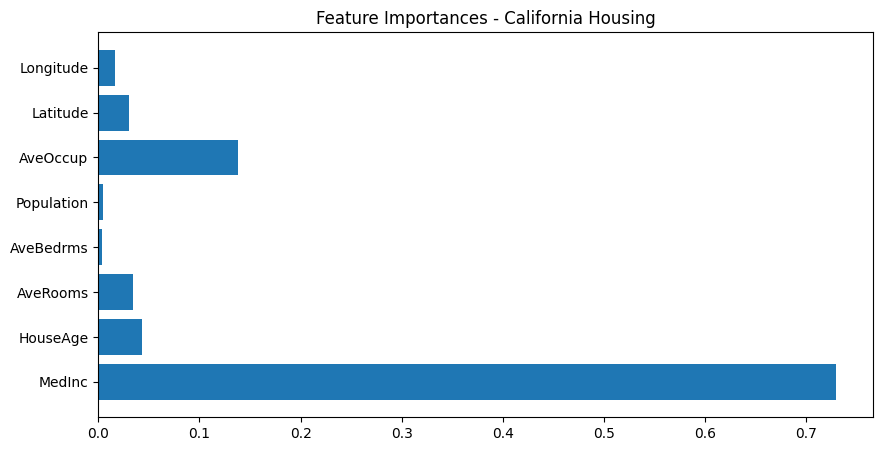

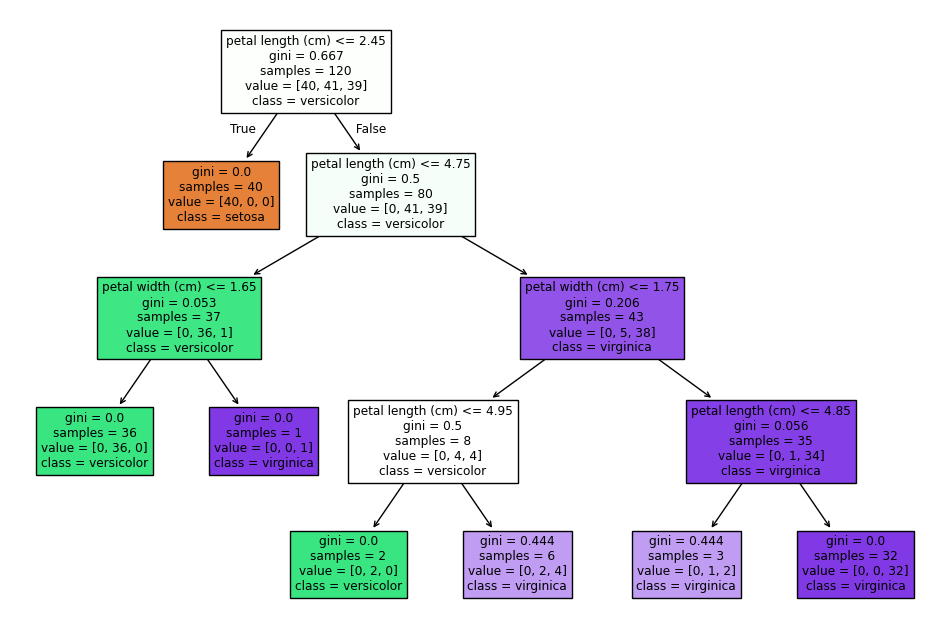

In [6]:

# === STUDENT CODE SECTION ===
# 👉 TASK: Visualize feature importances and tree structure

from sklearn import tree
import matplotlib.pyplot as plt

# Feature importances
plt.figure(figsize=(10,5))
plt.barh(X_california.columns, reg_tree.feature_importances_)
plt.title("Feature Importances - California Housing")
plt.show()

# Tree visualization
plt.figure(figsize=(12,8))
tree.plot_tree(clf_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# 💡 HINT: Try exporting tree as DOT file with tree.export_graphviz()



## ⚙️ Step 6: MLOps Extension — Model Tracking (Placeholder)

Model tracking helps manage experiments, log metrics, and version models.  
Here, we simulate how you might integrate a tracking system such as **MLflow**.


In [7]:

# === STUDENT CODE SECTION ===
# 👉 TASK: Placeholder for MLOps tracking setup

# 💡 HINT: This is a simulation. You can later replace it with real MLflow tracking.

experiment_name = "DecisionTree_Experiment"
params = {"max_depth": 6, "criterion": "squared_error"}
metrics = {"mse": mean_squared_error(y_test_c, y_pred_c), "r2": r2_score(y_test_c, y_pred_c)}

print(f"Experiment: {experiment_name}")
print("Parameters:", params)
print("Metrics:", metrics)

# 💡 HINT: In MLflow, you’d use mlflow.log_params() and mlflow.log_metrics()


Experiment: DecisionTree_Experiment
Parameters: {'max_depth': 6, 'criterion': 'squared_error'}
Metrics: {'mse': 0.4972838079675652, 'r2': 0.6205125146233951}



## 🧩 Step 7: Reflection and Discussion

Reflect on:
1. What are the strengths and weaknesses of Decision Trees?
2. When are Decision Trees preferable to linear models?
3. How does model depth affect bias and variance?
4. What challenges arise when integrating models into MLOps pipelines?

Write your answers below.


In [ ]:

# === STUDENT NOTE SECTION ===
# ✏️ Reflection Notes:
# Use Markdown or text to summarize your insights here.
